In [24]:
# import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")
%matplotlib inline

In [25]:
# import dataset
from tensorflow.keras.datasets import mnist

In [26]:
# loading dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [27]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

4


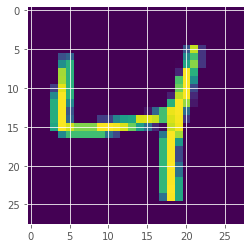

In [28]:
print(y_train[2])
plt.imshow(X_train[2])

In [29]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [30]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [31]:
X_train.max(), X_train.min()

(255, 0)

In [32]:
# Normalize the dataset(image)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [33]:
X_train.max(), X_train.min()

(1.0, 0.0)

In [34]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [35]:
# Reshape the dataset(image)
X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [36]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [37]:
input_shape = X_train[0].shape

In [38]:
input_shape

(28, 28, 1)

In [41]:
# Model Building
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), input_shape = input_shape, activation = "relu"),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(64, (3,3), activation = "relu"),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

In [42]:
# summary the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

In [63]:
# compile the model
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [64]:
# fit the model and train
history = model.fit(X_train, y_train, batch_size = 128, epochs = 10, validation_data = (X_test, y_test), verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 28s 462us/sample - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.0214 - val_accuracy: 0.9931
Epoch 2/10
60000/60000 [==============================] - 28s 460us/sample - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0225 - val_accuracy: 0.9921
Epoch 3/10
60000/60000 [==============================] - 31s 520us/sample - loss: 0.0142 - accuracy: 0.9952 - val_loss: 0.0208 - val_accuracy: 0.9937
Epoch 4/10
60000/60000 [==============================] - 33s 542us/sample - loss: 0.0125 - accuracy: 0.9956 - val_loss: 0.0249 - val_accuracy: 0.9935
Epoch 5/10
60000/60000 [==============================] - 31s 510us/sample - loss: 0.0115 - accuracy: 0.9959 - val_loss: 0.0263 - val_accuracy: 0.9933
Epoch 6/10
60000/60000 [==============================] - 30s 508us/sample - loss: 0.0100 - accuracy: 0.9967 - val_loss: 0.0209 - val_accuracy: 0.9935
Epoch 7/10
60000/60000 [====================

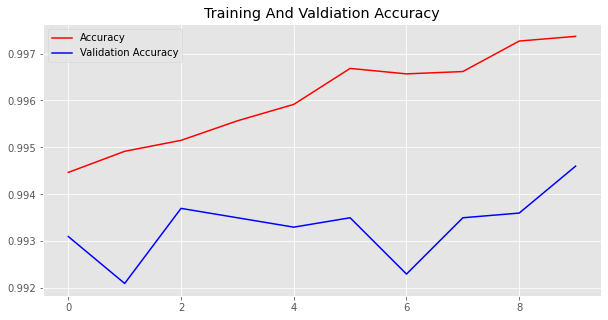

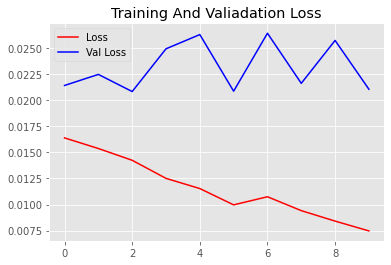

In [67]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epoch = range(len(acc))

plt.figure(figsize=(10,5))
plt.plot(epoch, acc, "r", label = "Accuracy")
plt.plot(epoch, val_acc, "b", label = "Validation Accuracy")
plt.title("Training And Valdiation Accuracy")

plt.legend()
plt.show()

plt.plot(epoch, loss, "r", label = "Loss")
plt.plot(epoch, val_loss, "b", label = "Val Loss")
plt.title("Training And Valiadation Loss")

plt.legend()
plt.show()

In [68]:
y_pred = model.predict_classes(X_test)

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score

[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1134    0    0    0    1    0    0    0    0]
 [   0    0 1028    0    0    0    0    4    0    0]
 [   0    0    0 1007    0    3    0    0    0    0]
 [   0    0    0    0  976    0    2    0    0    4]
 [   1    0    0    4    0  886    1    0    0    0]
 [   3    2    1    0    2    1  948    0    1    0]
 [   0    2    1    0    0    0    0 1024    0    1]
 [   2    0    2    1    0    0    0    2  965    2]
 [   0    0    0    0    4    1    0    1    2 1001]]


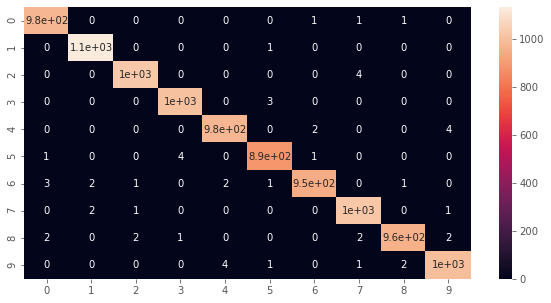

In [71]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True)
plt.show()

In [72]:
print(accuracy_score(y_test,y_pred))

0.9946


0


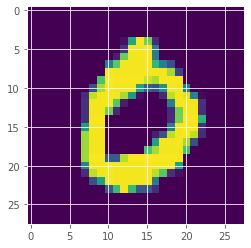

In [77]:
print(y_pred[3])
plt.imshow(X_test[3])

2


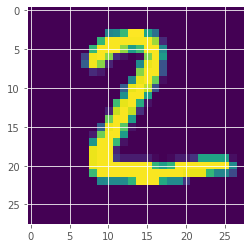

1


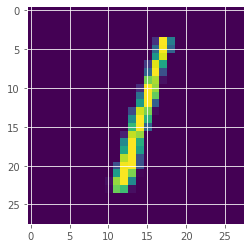

0


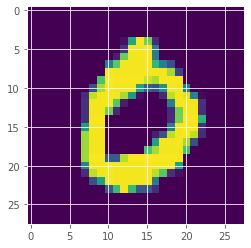

4


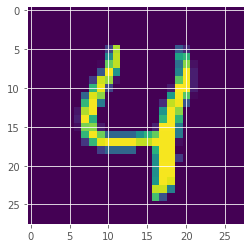

1


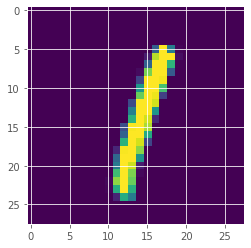

4


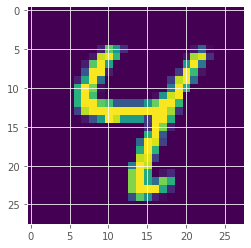

9


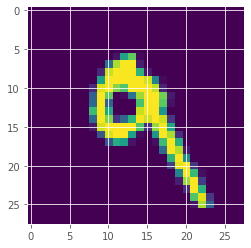

5


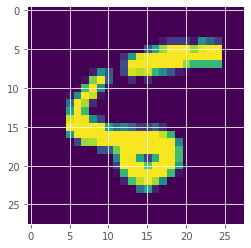

9


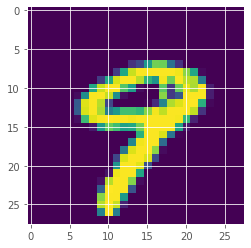

0


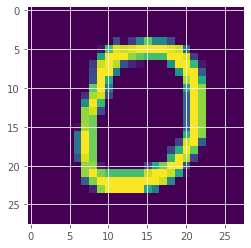

In [80]:
for i in range(1, 11):
    print(y_pred[i])
    plt.imshow(X_test[i])
    plt.show()